# Towards a Solution for Improving Customer Data Quality at Triodos Bank
### by Lade Tawak


## Dataset selection

When I started this exploration, I found [this dataset on GitHub](https://github.com/jorritb/dutch-postal-codes/blob/master/postcodes_20190613.csv) which contains over 76000 Dutch addresses and their corresponding postcodes, although it is from 2019.

I later found another [dataset from the Dutch Central Bureau  of Statistics (CBS)](https://www.cbs.nl/nl-nl/maatwerk/2023/35/buurt-wijk-en-gemeente-2023-voor-postcode-huisnummer) which contains all the postcodes and their corresponding cities. It is from 2023 and is the most recent one on their website. This was used for Phase 2 and 3.

# C. Phase 3:

## Discarding the chatbot

Following further value evaluation of this solution, it came up that a chatbot might not be the best approach

There is already a **data driven feedback loop** in the system because the customer sees their Data Quality Score based on data that they already input in the system.

If they confirm or update their data, this serves as an additional input to the system, and the score changes. The system continues to adapt because the score degrades as the data ages (i.e. it is no longer recent), which prompts further interaction. This encourages ongoing engagement without relying on energy intensive chatbots.

Furthermore sustainability is a key value for the bank. Tools that are lower on sustainability were rated lower by the Data Stewards. The bank's customers and stakeholders care deeply about the core mission of sustainability and chatbots are resource intensive.

Thirdly, the score itself is a trigger and motivator. The main goal of this solution is to prompt users to check their data. It does not directly change any of the data, keeping the human in the loop. Since it exists in the app, the user can simply update their details in their profile.

Finally, chatbots could possibly introduce friction where the expectations of what the chatbot can do and what it can actually do cause frustration.

Conversly, there are very few problems from not using a chatbot. The biggest loss would probably be testing more nudging strategies

## Using fuzzy matching to validate the postcode-city

On further evaluation, it became clear that there could be other ways to check the correctness of city-postcode matches by using a map of the available data from the CBS.

Creating a simple map of the postcode and city would always give the most accurate answer. Using fuzzy matching would also help because then typos can be identified and differentiated from completely wrong city matches. Fuzzy matching could also help in identifying the possible correct postcode given the city if the postcode is not found in the map.

These all use less energy than building a machine learning model to predict the city (as I have calculated below).

Furthermore, the main problem that Triodos has with the incorrect addresses is that postcodes and cities do not match. This problem is predominantly in the Netherlands.  And since Triodos now has validation checks in the app so that when a user is updating their address or creating an account, they only need to enter the postcode and house number. The rest of the address is populated based on the Dutch Postcode System meaning that the rest of the information is not necessary to include in the code.  

Thus the map will only be focused on city and postcode and not the entire address since there is a **human in the loop** who will have to confirm and make the changes. Using the whole address would also make the checks slower and less efficienct.

This simplified approach is efficient and aligns with stakeholder values, recognizing that there is a **human in the loop** who will ultimately make the change.


**Changes to be made**
* using a postcode city map and fuzzy matching to check postcode and city matches and suggest the correct city and / or postcode
* discarding the chatbot and replacing with updating data directly in the interface based on value sensitive design approaches (this is in a separate python file attached)

In [ ]:
import pandas as pd
addresses = pd.read_csv("PC62023NL.csv")
addresses.head()

GemCode    GemNaam  WijkCode Wijknaam   BuurtCode         Buurtnaam     PC6  \
0  GM0014  Groningen  WK001400  Centrum  BU00140000  Binnenstad-Noord  9711LX   
1  GM0014  Groningen  WK001400  Centrum  BU00140000  Binnenstad-Noord  9712AA   
2  GM0014  Groningen  WK001400  Centrum  BU00140000  Binnenstad-Noord  9712AB   
3  GM0014  Groningen  WK001400  Centrum  BU00140000  Binnenstad-Noord  9712AC   
4  GM0014  Groningen  WK001400  Centrum  BU00140000  Binnenstad-Noord  9712AD   

   AantalAdressen  
0               1  
1               9  
2               6  
3              12  
4              15

In [ ]:
addresses['PC4'] = addresses['PC6'].str[:4]
addresses

GemCode         GemNaam  WijkCode                      Wijknaam  \
0       GM0014       Groningen  WK001400                       Centrum   
1       GM0014       Groningen  WK001400                       Centrum   
2       GM0014       Groningen  WK001400                       Centrum   
3       GM0014       Groningen  WK001400                       Centrum   
4       GM0014       Groningen  WK001400                       Centrum   
...        ...             ...       ...                           ...   
493159  GM1992  Voorne aan Zee  WK199232                    Zwartewaal   
493160  GM1992  Voorne aan Zee  WK199233  Recreatiestrook Brielse Maas   
493161  GM1992  Voorne aan Zee  WK199233  Recreatiestrook Brielse Maas   
493162  GM1992  Voorne aan Zee  WK199233  Recreatiestrook Brielse Maas   
493163  GM1992  Voorne aan Zee  WK199233  Recreatiestrook Brielse Maas   

         BuurtCode                     Buurtnaam     PC6  AantalAdressen   PC4  
0       BU00140000              Binnenstad-Noord  9711LX               1  9711  
1       BU00140000              Binnenstad-Noord  9712AA               9  9712  
2       BU00140000              Binnenstad-Noord  9712AB               6  9712  
3       BU00140000              Binnenstad-Noord  9712AC              12  9712  
4       BU00140000              Binnenstad-Noord  9712AD              15  9712  
...            ...                           ...     ...             ...   ...  
493159  BU19923209             Verspreide huizen  3238LZ             163  3238  
493160  BU19923300  Recreatiestrook Brielse Maas  3231NA               3  3231  
493161  BU19923300  Recreatiestrook Brielse Maas  3231NC               3  3231  
493162  BU19923300  Recreatiestrook Brielse Maas  3231ND              12  3231  
493163  BU19923300  Recreatiestrook Brielse Maas  3231NE               5  3231  

[493164 rows x 9 columns]

In [ ]:
df = addresses[['PC4', 'GemNaam']].reset_index(drop=True)
df

PC4         GemNaam
0       9711       Groningen
1       9712       Groningen
2       9712       Groningen
3       9712       Groningen
4       9712       Groningen
...      ...             ...
493159  3238  Voorne aan Zee
493160  3231  Voorne aan Zee
493161  3231  Voorne aan Zee
493162  3231  Voorne aan Zee
493163  3231  Voorne aan Zee

[493164 rows x 2 columns]

In [ ]:
df = df.drop_duplicates(keep='first')
df

PC4         GemNaam
0       9711       Groningen
1       9712       Groningen
457     9713       Groningen
464     9718       Groningen
514     9717       Groningen
...      ...             ...
492410  3233  Voorne aan Zee
492711  3231  Voorne aan Zee
492795  3232  Voorne aan Zee
492796  3237  Voorne aan Zee
493087  3238  Voorne aan Zee

[4089 rows x 2 columns]

I want to see how many 4 digit codes occur in multiple cities

In [ ]:
multiple = (df.groupby('PC4')['GemNaam'].nunique().reset_index(name='n_munis').query('n_munis > 1'))
multiple

PC4  n_munis
131   1261        2
344   1724        2
1323  4062        2
1373  4197        2
1741  5091        2
1884  5383        2
2389  6574        2
2538  6924        2
2576  7011        2
2701  7351        2
2865  7693        2
2866  7694        2
2998  7933        2
3017  7963        2
3018  7964        2
3629  9207        2
3730  9417        2
3735  9423        2

In [ ]:
mutiples = (df.groupby('PC4')['GemNaam'].unique().reset_index(name='municipalities').query('municipalities.str.len() > 1'))
mutiples

PC4                   municipalities
131   1261                [Blaricum, Laren]
344   1724         [Schagen, Dijk en Waard]
1323  4062              [Tiel, West Betuwe]
1373  4197             [Buren, West Betuwe]
1741  5091         [Hilvarenbeek, Oirschot]
1884  5383     ['s-Hertogenbosch, Bernheze]
2389  6574          [Nijmegen, Berg en Dal]
2538  6924             [Duiven, Lingewaard]
2576  7011  [Doetinchem, Oude IJsselstreek]
2701  7351                 [Apeldoorn, Ede]
2865  7693         [Hardenberg, Twenterand]
2866  7694         [Hardenberg, Twenterand]
2998  7933          [Hoogeveen, Westerveld]
3017  7963          [De Wolden, Westerveld]
3018  7964          [De Wolden, Westerveld]
3629  9207     [Opsterland, Smallingerland]
3730  9417     [Westerveld, Midden-Drenthe]
3735  9423     [Westerveld, Midden-Drenthe]

There are two possible ways to treat this. I could either make a dictionary map of just the known postcodes that have multiples or I could make it that the system treats every postcode as possible beloning to more than one municipality. Using a "universal" approach is more scalable and can work even if the municipality list changes again. It could also work for other country postcodes as well. Although it is faster in the short term, the "specific" approach is more complex and less efficient in the long term. If municipalities are merged, split, or new ones emerge, the whole thing has to be recomputed.

I also considered going back to use the entire postcode-6. But that means a larger lookup and too many unique values. Using PC4 is faster to query and rebuild, it is stable over time, the system does not need to store and compare full address information making it more privacy friendly. Although it is less precise and there are a few multiples, it is negligible. We want to go for efficiency and use of less energy and resources. So I'm sticking with PC4

In [ ]:
full_map = (
    df
    .groupby('PC4')['GemNaam']
    .apply(lambda s: set(s.str.lower()))
    .to_dict()
)

In [ ]:
full_map

{'1011': {'amsterdam'},
 '1012': {'amsterdam'},
 '1013': {'amsterdam'},
 '1014': {'amsterdam'},
 '1015': {'amsterdam'},
 '1016': {'amsterdam'},
 '1017': {'amsterdam'},
 '1018': {'amsterdam'},
 '1019': {'amsterdam'},
 '1021': {'amsterdam'},
 '1022': {'amsterdam'},
 '1023': {'amsterdam'},
 '1024': {'amsterdam'},
 '1025': {'amsterdam'},
 '1026': {'amsterdam'},
 '1027': {'amsterdam'},
 '1028': {'amsterdam'},
 '1031': {'amsterdam'},
 '1032': {'amsterdam'},
 '1033': {'amsterdam'},
 '1034': {'amsterdam'},
 '1035': {'amsterdam'},
 '1036': {'amsterdam'},
 '1037': {'amsterdam'},
 '1041': {'amsterdam'},
 '1042': {'amsterdam'},
 '1043': {'amsterdam'},
 '1044': {'amsterdam'},
 '1045': {'amsterdam'},
 '1046': {'amsterdam'},
 '1047': {'amsterdam'},
 '1051': {'amsterdam'},
 '1052': {'amsterdam'},
 '1053': {'amsterdam'},
 '1054': {'amsterdam'},
 '1055': {'amsterdam'},
 '1056': {'amsterdam'},
 '1057': {'amsterdam'},
 '1058': {'amsterdam'},
 '1059': {'amsterdam'},
 '1060': {'amsterdam'},
 '1061': {'amste

In [ ]:
def pc4_muni_valid(full_postcode, user_muni):
    p4 = str(full_postcode)[:4]
    allowed = full_map.get(p4, set())
    return user_muni.strip().lower() in allowed


In [ ]:
# Testing the function
cases = [
    ("1261AB", "Laren",       True),
    ("1261AB", "Nowhere",    False),
    ("1261AB", "Amsterdam",   False),
    ("1234GH", "Utrecht",     False),
    ("9999ZZ", "Somewhere",     False),
]


for pc, muni, expected in cases:
    out = pc4_muni_valid(pc, muni)
    assert out == expected, f"{pc} | {muni}: got {out}, want {expected}"
print("All unit-tests passed")


All unit-tests passed


Now that the map is working. I want to check whether the PC4 exists in the dataset

In [ ]:
def postcode4_exists(full_postcode):
    p4 = str(full_postcode)[:4]
    return p4 in full_map


print(postcode4_exists("1234AB"))
print(postcode4_exists("9999ZZ"))

False
True


This creates a challenge because although there are postcodes that begin with 9999, there is no 9999ZZ. So it might be best to use the full postcode

In [ ]:
pc6_set = set(addresses['PC6'])
print(pc6_set)

{'7131ET', '5481HC', '5466PR', '9903BD', '1012EP', '3812BD', '9465TL', '5283XW', '3281BC', '7495RW', '6843VN', '9851BD', '4651XD', '1566DN', '3826AD', '3195HC', '4506GD', '1013XA', '1506GB', '3601BE', '3083TK', '5763BC', '9468GM', '4328NJ', '5045DE', '1111TZ', '1781PL', '5706XB', '9055NM', '9173GD', '4201CL', '2678NH', '9791LH', '7241CA', '3042RT', '1212BW', '2497VK', '8051LM', '1017DW', '3992PC', '5912CD', '2574JN', '1333DE', '2285EZ', '3224HE', '2231KD', '8304DS', '3931EA', '3731XA', '4326LL', '1444HE', '6671GN', '6163BW', '7534PJ', '5454NK', '4707ZD', '9728SX', '2042NM', '8723CH', '4157GL', '1091WV', '7091XP', '2906RA', '3553AP', '7412SE', '1975CC', '5632LN', '2821WZ', '5616TS', '7604BB', '7384AB', '3738VP', '1613HH', '8226MD', '3143AD', '7231CE', '3372AB', '5616JK', '7958PZ', '9521GG', '4824BR', '1054JG', '5709AK', '3253PZ', '1432GB', '5658EB', '3741PK', '4003DC', '3813RS', '4906GC', '1015LB', '1784XN', '1971DP', '1811CK', '4357CJ', '7471AK', '5408PG', '4847BX', '4353ED', '4301MJ',

In [ ]:
def postcode6_exists(full_postcode):
    return str(full_postcode) in pc6_set

# Test
print(postcode6_exists("1234AB")) #should be false
print(postcode6_exists("9999XB")) #should be true

False
True


In [ ]:
def validate_pc6(full_postcode, user_muni):
    pc6 = str(full_postcode)
    if pc6 not in pc6_set:
        return "UNKNOWN_PC6"

I can make this better by suggesting the possible correct postcodes and municipalities which I'll do after creating a list of gementees and checking for typos

In [ ]:
!pip install rapidfuzz
from rapidfuzz import process, fuzz

## Improving by suggesting postcodes and municipalities as well as checking for typos

In [ ]:
#building a list of municipalities from full_map made earlier
gementees = sorted({m for munis in full_map.values() for m in munis})
gementees

["'s-gravenhage",
 "'s-hertogenbosch",
 'aa en hunze',
 'aalsmeer',
 'aalten',
 'achtkarspelen',
 'alblasserdam',
 'albrandswaard',
 'alkmaar',
 'almelo',
 'almere',
 'alphen aan den rijn',
 'alphen-chaam',
 'altena',
 'ameland',
 'amersfoort',
 'amstelveen',
 'amsterdam',
 'apeldoorn',
 'arnhem',
 'assen',
 'asten',
 'baarle-nassau',
 'baarn',
 'barendrecht',
 'barneveld',
 'beek',
 'beekdaelen',
 'beesel',
 'berg en dal',
 'bergeijk',
 'bergen (l.)',
 'bergen (nh.)',
 'bergen op zoom',
 'berkelland',
 'bernheze',
 'best',
 'beuningen',
 'beverwijk',
 'bladel',
 'blaricum',
 'bloemendaal',
 'bodegraven-reeuwijk',
 'boekel',
 'borger-odoorn',
 'borne',
 'borsele',
 'boxtel',
 'breda',
 'bronckhorst',
 'brummen',
 'brunssum',
 'bunnik',
 'bunschoten',
 'buren',
 'capelle aan den ijssel',
 'castricum',
 'coevorden',
 'cranendonck',
 'culemborg',
 'dalfsen',
 'dantumadiel',
 'de bilt',
 'de fryske marren',
 'de ronde venen',
 'de wolden',
 'delft',
 'den helder',
 'deurne',
 'deventer',
 

In [ ]:
def suggest_municipality_1(user_muni, choices=gementees, score_cutoff=80):
    best, score, _ = process.extractOne(
        user_muni.lower(),
        choices,
        scorer=fuzz.ratio,
        score_cutoff=score_cutoff
    ) or (None, 0)
    return best, score

# test
print(suggest_municipality_1("Amstdam"))
print(suggest_municipality_1("Rottedram"))
print(suggest_municipality_1("Xyzdam"))


('amsterdam', 87.5)
('rotterdam', 88.88888888888889)


ValueError: not enough values to unpack (expected 3, got 2)

There is an error in the code where because `process.extractOne` expects 3 values (including the index) but got 2 because Xyzdam does not exist and there is no close match which means there's no index. So I improved it below to check the results of `process.extractOne` first then enable it to get the best match and the score in a tuple which even if there is no match, there is still a result.

In [ ]:
def suggest_municipality_r(user_muni, choices=gementees, score_cutoff=80):
    result = process.extractOne(
        user_muni.lower(),
        choices,
        scorer=fuzz.ratio,
        score_cutoff=score_cutoff
    )

    if result:
        return (result[0], result[1])
    else:
        return (None, 0)

# tests
print(suggest_municipality_r("Amstdam"))
print(suggest_municipality_r("Xyzdam"))
print(suggest_municipality_r("capel aan ijsel"))
print(suggest_municipality_r("valkrnbirg der aan geel"))
print(suggest_municipality_r("Oud Ijsselstrk"))


('amsterdam', 87.5)
(None, 0)
('capelle aan den ijssel', 81.08108108108108)
(None, 0)
('oude ijsselstreek', 90.32258064516128)


In [ ]:
def suggest_municipality_wr(user_muni, choices=gementees, score_cutoff=80):
    result = process.extractOne(
        user_muni.lower(),
        choices,
        scorer=fuzz.WRatio,
        score_cutoff=score_cutoff
    )

    if result:
        return (result[0], result[1])
    else:
        return (None, 0)

# test
print(suggest_municipality_wr("Amstdam"))
print(suggest_municipality_wr("Xyzdam"))
print(suggest_municipality_wr("capel aan ijsel"))
print(suggest_municipality_wr("valkrnbirg der aan geel"))
print(suggest_municipality_wr("Oud Ijsselstrk"))



('amsterdam', 87.5)
(None, 0)
('capelle aan den ijssel', 81.08108108108108)
('voorne aan zee', 85.5)
('oude ijsselstreek', 90.32258064516128)


In [ ]:
def suggest_municipality_q(user_muni, choices=gementees, score_cutoff=80):
    result = process.extractOne(
        user_muni.lower(),
        choices,
        scorer=fuzz.QRatio,
        score_cutoff=score_cutoff
    )

    if result:
        return (result[0], result[1])
    else:
        return (None, 0)

# test
print(suggest_municipality_q("Amstdam"))
print(suggest_municipality_q("Xyzdam"))
print(suggest_municipality_q("capel aan ijsel"))
print(suggest_municipality_q("valkrnbirg der aan geel"))
print(suggest_municipality_q("Oud Ijsselstrk"))



('amsterdam', 87.5)
(None, 0)
('capelle aan den ijssel', 81.08108108108108)
(None, 0)
('oude ijsselstreek', 90.32258064516128)


In [ ]:
def suggest_municipality_tsr(user_muni, choices=gementees, score_cutoff=80):
    result = process.extractOne(
        user_muni.lower(),
        choices,
        scorer=fuzz.token_sort_ratio,
        score_cutoff=score_cutoff
    )

    if result:
        return (result[0], result[1])
    else:
        return (None, 0)

# test
print(suggest_municipality_tsr("Amstdam"))
print(suggest_municipality_tsr("Xyzdam"))
print(suggest_municipality_tsr("capel aan ijsel"))
print(suggest_municipality_tsr("valkrnbirg der aan geel"))
print(suggest_municipality_tsr("Oud Ijsselstrk"))

('amsterdam', 87.5)
(None, 0)
('capelle aan den ijssel', 81.08108108108108)
('valkenburg aan de geul', 84.44444444444444)
('oude ijsselstreek', 90.32258064516128)


Based on the exploration, the different scorers had pretty similar results but they didn't catch `"valkrnbirg der aan geel"`. Only `.token_sort_ratio` did. So that's what I'll use


In [ ]:
def validate_muni_spell(user_muni):
    valid = user_muni.strip().lower() in gementees
    if valid:
        return {"status":"VALID", "suggestion":None}
    best, score = suggest_municipality_tsr(user_muni)
    if best:
        return {"status":"TYPO_NEAR_MATCH", "suggestion":best, "score":score}
    return {"status":"UNKNOWN", "suggestion":None}

## improving gementee and postcode suggestion if no match is found

Here, O am creating a set to check through which is faster than searching in a dictionary. This is a quick way of veryfying the existinece of a postcode in the data

In [ ]:
pc6_to_gem = {row.PC6: row.GemNaam for _, row in addresses.iterrows()}
pc6_gem_set = set(pc6_to_gem)

In [ ]:
pc6_gem_set

{'7131ET',
 '5481HC',
 '5466PR',
 '9903BD',
 '1012EP',
 '3812BD',
 '9465TL',
 '5283XW',
 '3281BC',
 '7495RW',
 '6843VN',
 '9851BD',
 '4651XD',
 '1566DN',
 '3826AD',
 '3195HC',
 '4506GD',
 '1013XA',
 '1506GB',
 '3601BE',
 '3083TK',
 '5763BC',
 '9468GM',
 '4328NJ',
 '5045DE',
 '1111TZ',
 '1781PL',
 '5706XB',
 '9055NM',
 '9173GD',
 '4201CL',
 '2678NH',
 '9791LH',
 '7241CA',
 '3042RT',
 '1212BW',
 '2497VK',
 '8051LM',
 '1017DW',
 '3992PC',
 '5912CD',
 '2574JN',
 '1333DE',
 '2285EZ',
 '3224HE',
 '2231KD',
 '8304DS',
 '3931EA',
 '3731XA',
 '4326LL',
 '1444HE',
 '6671GN',
 '6163BW',
 '7534PJ',
 '5454NK',
 '4707ZD',
 '9728SX',
 '2042NM',
 '8723CH',
 '4157GL',
 '1091WV',
 '7091XP',
 '2906RA',
 '3553AP',
 '7412SE',
 '1975CC',
 '5632LN',
 '2821WZ',
 '5616TS',
 '7604BB',
 '7384AB',
 '3738VP',
 '1613HH',
 '8226MD',
 '3143AD',
 '7231CE',
 '3372AB',
 '5616JK',
 '7958PZ',
 '9521GG',
 '4824BR',
 '1054JG',
 '5709AK',
 '3253PZ',
 '1432GB',
 '5658EB',
 '3741PK',
 '4003DC',
 '3813RS',
 '4906GC',
 '1015LB',

In [ ]:
#use fuzzy matching to suggest pc6
def suggest_pc6(user_pc6, top_n=3, cutoff=80):
    possible_pc6 = process.extract(user_pc6.upper(), pc6_gem_set,
                           scorer=fuzz.WRatio, limit=top_n)
    return [(pc, pc6_to_gem[pc], score)
            for pc, score, _ in possible_pc6
            if score >= cutoff]

#use fuzzy matching to suggest gemeente
def suggest_gem(user_gem, top_n=3, cutoff=80):
    possible_gem = process.extract(user_gem.title(), gementees,
                           scorer=fuzz.token_sort_ratio, limit=top_n)
    return [(gem, score) for gem, score, _ in possible_gem if score >= cutoff]


#combine both and use to validate
def validate_pc6_gem(user_pc6, user_gem):
    result = {"pc6": user_pc6, "gem": user_gem}
    #check for exact pc6
    if user_pc6 in pc6_set:
        correct_gem = pc6_to_gem[user_pc6]
        if user_gem == correct_gem:
            result.update(status="ALL_GOOD",
                          suggestions=[])
            return result

        # if there's a typo suggest gem from gementees
        g_sugg = suggest_gem(user_gem)
        result.update(status="gem_MISMATCH",
                      suggestions=[{"type":"gem","value":g} for g,_ in g_sugg])
        return result

    #if the PC6 does not match any esxisting PC6, suggest
    pc_sugg = suggest_pc6(user_pc6)
    if pc_sugg:
        result.update(status="PC6_SUGGEST",
                      suggestions=[{"type":"pc6","value":pc,"gem":gem,"score":scr}
                                   for pc,gem,scr in pc_sugg])
        return result

    # if PC6 returns unknown and there are no good suggestions
    g_sugg = suggest_gem(user_gem)
    result.update(status="UNKNOWN",
                  suggestions=[{"type":"gem","value":g} for g,_ in g_sugg])
    return result


In [ ]:
#Testing
tests = [
    # (input_pc6, input_gem, expected_status, expected_suggestions_prefix)
    ("1012AB", "Amsterdam",   "ALL_GOOD",      []),
    ("1012AB", "Amsterddam",  "gem_MISMATCH", ["gem"]),    # typo in gem
    ("9999ZZ", "Utrecht",     "UNKNOWN",   ["gem"]),     # PC6 no match but suggestions
    ("9999ZZ", "Xyzdam",    "UNKNOWN",       []),    # no PC6 or gem match
]

for pc6, gem, exp_status, exp_prefix in tests:
    out =  validate_pc6_gem(pc6, gem)
    status      = out["status"]
    suggestions = out["suggestions"]

    # assertions
    assert status == exp_status, (
        f"For ({pc6},{gem}) expected status {exp_status}, got {status}"
    )
    if exp_prefix:
        assert suggestions, f"Expected suggestions for {pc6},{gem}"
        # each suggestion is a dict with a "type" key
        types = [s["type"] for s in suggestions]
        assert types[0].startswith(exp_prefix[0]), (
            f"Expected first suggestion type to start with {exp_prefix[0]}, got {types[0]}"
        )
    else:
        assert not suggestions, f"Didn’t expect suggestions for {pc6},{gem}"

print("All tests passed!")


AssertionError: For (9999ZZ,Utrecht) expected status UNKNOWN, got PC6_SUGGEST

In [ ]:
#checking why it failed
out_9999ZZ_Utrecht = validate_pc6_gem("9999ZZ", "Utrecht")
print("Output:", out_9999ZZ_Utrecht)

Output: {'pc6': '9999ZZ', 'gem': 'Utrecht', 'status': 'PC6_SUGGEST', 'suggestions': [{'type': 'pc6', 'value': '9979ZZ', 'gem': 'Het Hogeland', 'score': 83.33333333333334}]}


The problem is that there was a suggestion for 9999ZZ. It doesn't exist in the map, but 9979ZZ does. So I'll reduce all the cut off to 80

In [ ]:
#use fuzzy matching to suggest pc6
def suggest_pc6(user_pc6, top_n=3, cutoff=80):
    possible_pc6 = process.extract(user_pc6.upper(), pc6_gem_set,
                           scorer=fuzz.WRatio, limit=top_n)
    return [(pc, pc6_to_gem[pc], score)
            for pc, score, _ in possible_pc6
            if score >= cutoff]

#use fuzzy matching to suggest gemeente.
def suggest_gem(user_gem, top_n=3, cutoff=80):
    possible_gem = process.extract(user_gem.title(), gementees,
                           scorer=fuzz.token_sort_ratio, limit=top_n)
    return [(gem, score) for gem, score, _ in possible_gem if score >= cutoff]


#combine both and use to validate
def validate_pc6_gem(user_pc6, user_gem):
    result = {"pc6": user_pc6, "gem": user_gem}
    #check for exact pc6
    if user_pc6 in pc6_set:
        correct = pc6_to_gem[user_pc6]
        if user_gem == correct:
            result.update(status="ALL_GOOD",
                          suggestions=[])
            return result

        # if pc6 is valid but gem is wrong suggest gem typos
        g_sugg = suggest_gem(user_gem)
        result.update(status="gem_MISMATCH",
                      suggestions=[{"type":"gem","value":g} for g,_ in g_sugg])
        return result

    #if the PC6 does not match any esxisting PC6, suggest
    pc_sugg = suggest_pc6(user_pc6)
    if pc_sugg:
        result.update(status="PC6_SUGGEST",
                      suggestions=[{"type":"pc6","value":pc,"gem":gem,"score":scr}
                                   for pc,gem,scr in pc_sugg])
        return result

    # if PC6 returns unknown and there are no good suggestions
    g_sugg = suggest_gem(user_gem)
    result.update(status="UNKNOWN",
                  suggestions=[{"type":"gem","value":m,"score":s} for m,s in g_sugg])
    return result


I will also update the test expected status for 9999ZZ Utrecht to better reflect the real status

In [ ]:
tests = [
    # (input_pc6, input_gem, expected_status, expected_suggestions_prefix)
    ("1012AB", "Amsterdam",   "ALL_GOOD",      []),
    ("1012AB", "Amsterddam",  "gem_MISMATCH", ["gem"]),    # typo in gem
    ("9999ZZ", "Utrecht",     "PC6_SUGGEST",   ["pc6"]),     # PC6 no match but suggestions
    ("XXXXXX", "Xyzdam",    "UNKNOWN",       []),    # no PC6 or gem match
]

for pc6, gem, exp_status, exp_prefix in tests:
    out =  validate_pc6_gem(pc6, gem)
    status      = out["status"]
    suggestions = out["suggestions"]

    # assertions
    assert status == exp_status, (
        f"For ({pc6},{gem}) expected status {exp_status}, got {status}"
    )
    # if we expect suggestions, check the type of the first one
    if exp_prefix:
        assert suggestions, f"Expected suggestions for {pc6},{gem}"
        # each suggestion is a dict with a "type" key
        types = [s["type"] for s in suggestions]
        assert types[0].startswith(exp_prefix[0]), (
            f"Expected first suggestion type to start with {exp_prefix[0]}, got {types[0]}"
        )
    else:
        assert not suggestions, f"Didn’t expect suggestions for {pc6},{gem}"

print("All tests passed!")

All tests passed!


In [ ]:
out_9999ZZ_xyz = validate_pc6_gem("9999ZZ", "XYzdam")
print("Output:", out_9999ZZ_xyz)

Output: {'pc6': '9999ZZ', 'gem': 'XYzdam', 'status': 'PC6_SUGGEST', 'suggestions': [{'type': 'pc6', 'value': '9979ZZ', 'gem': 'Het Hogeland', 'score': 83.33333333333334}]}


### Validating email and phone number


In [ ]:
!pip install phonenumbers
import re
import phonenumbers
from phonenumbers.phonenumberutil import NumberParseException

email.regex = re.compile(r"^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$")
def is_valid_email(email):
    return bool(email.regex.match(email))

def is_valid_phone(number):
    try:
        num = phonenumbers.parse(number, "NL")
        return phonenumbers.is_valid_number(phone)
    except:
        return False


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.3 MB/s eta 0:00:00


## Creating the data quality score

In [ ]:
#Creating customer profiles to test the score
user_personal_data = {
    "first_name": "Femke",
    "last_name": "Bol",
    "email": "femke.bol",
    "phone_number": "+32512345678",
    "street": "Heidelberglaan 15",
    "postcode": "3584CS",
    "city": "Utrcht",
    "account_updated_confrimed_date": "2022-01-01"
}

user_personal_data_2 = {
    "first_name": "Femke",
    "last_name": "Bol",
    "email": "femke2.bol",
    "phone_number": "+32512345678",
    "street": "",
    "postcode": "1097DL",
    "city": "Amstdm",
    "account_updated_confrimed_date": "2025-01-01"
}

user_personal_data_3 = {
    "first_name": "Femke",
    "last_name": "Bol",
    "email": "",
    "phone_number": "+32512345678",
    "street": "",
    "postcode": "1097DL",
    "city": "Utrcht",
    "account_creation_date": "2025-01-01"
}

user_personal_data_4 = {
    "first_name": "Femke",
    "last_name": "Bol",
    "email": "femke2.bol",
    "phone_number": "+32512345678",
    "street": "",
    "postcode": "1097DL",
    "city": "Utrecht",
    "account_updated_confrimed_date": "2025-01-01"
}

user_personal_data_5 = {
    "first_name": "Femke",
    "last_name": "Bol",
    "email": "femke2.bol",
    "phone_number": "+32512345678",
    "street": "",
    "postcode": "1097DL",
    "city": "",
    "account_updated_confrimed_date": "2025-01-01"
}

In [ ]:
def calculate_data_quality_score(data: dict) -> dict:
    # completeness
    fields = ['email','phone_number','street','postcode','city']
    missing = [f for f in fields if not data.get(f)]
    comp    = 1 - len(missing)/len(fields)

    # correctness
    corr_issues = []
    score_corr  = 0

    #Postcode and City Validation
    pc6 = data.get('postcode')
    gem = data.get('city')

    #attempt validation if both postcode and gem are provided and are strings:
    if isinstance(pc6, str) and isinstance(gem, str) and pc6 and gem:
        validation_result = validate_pc6_gem(pc6, gem)
        status = validation_result['status']
        suggestions = validation_result.get('suggestions', [])

        if status == "ALL_GOOD":
            score_corr += 1
        else:
            # Handle correctness issues for postcode/city based on status
            if status == "gem_MISMATCH":
                correct_gem = pc6_to_gem.get(pc6, 'N/A')
                # Check if there's a suggestion for municipality
                best_gem_sugg = suggestions[0] if suggestions else None

                #check if best_gem_sugg exists and has the 'score' key
                best_gem_score = best_gem_sugg.get('score', 0) if isinstance(best_gem_sugg, dict) else 0

                if best_gem_sugg and best_gem_score >= 80:
                     issue_msg = f"There seems to be a typo in your city. Do you mean '{correct_gem}'?"
                     corr_issues.append(issue_msg)
                elif correct_gem != 'N/A': # Valid postcode, but the municipality is different
                    issue_msg = f"Postcode and city do not match. Do you mean: '{correct_gem}'."
                    corr_issues.append(issue_msg)


            elif status == "PC6_SUGGEST":
                issue_msg = f"Postcode '{pc6}' not found."
                corr_issues.append(issue_msg)
                if suggestions:
                     sugg = suggestions[0]
                     corr_issues.append(f"Did you mean postcode '{sugg['value']}' for municipality '{sugg['gem']}'?")

            elif status == "UNKNOWN":
                 issue_msg = f"Postcode '{pc6}' and city '{gem}' could not be confirmed. Please check."
                 corr_issues.append(issue_msg)

    else:
         if not pc6 or not isinstance(pc6, str):
             corr_issues.append("Postcode is missing.")
         if not gem or not isinstance(gem, str):
             corr_issues.append("City is missing.")
             if pc6 and isinstance(pc6, str):
                 pc4 = pc6[:4]
                 possible_cities = full_map.get(pc4, set())

                 if possible_cities:
                      if len(possible_cities) == 1:
                           suggested_city = list(possible_cities)[0]
                           corr_issues.append(f"City is missing. A possible city is '{suggested_city.title()}'.")
                      else:
                           cities_list = ", ".join([city.title() for city in possible_cities])
                           corr_issues.append(f"City is missing. Do you mean: {cities_list}.")

    #Email Validation
    if is_valid_email(data.get('email', "")):
        score_corr += 1
    else:
        email_addr = data.get('email', "")
        if email_addr:
            corr_issues.append(f"Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account")
        else:
            corr_issues.append("Please enter your email address.")


    #Phone Validation
    if is_valid_phone(data.get('phone_number', "")):
        score_corr += 1
    else:
        phone_num = data.get('phone_number', "")
        if phone_num:
            corr_issues.append(f"Please check that this is your phone number, also include the country code e.g. +31")
        else:
             corr_issues.append("Phone number is missing.")


    #calculate correctness score
    correct_count = 0

    if not any("Postcode" in issue for issue in corr_issues) and not any("Municipality is missing" in issue for issue in corr_issues) and not any("Municipality is in an incorrect format" in issue for issue in corr_issues):
         correct_count += 1

    if not any("email" in issue.lower() for issue in corr_issues):
         correct_count += 1

    if not any("phone" in issue.lower() for issue in corr_issues):
         correct_count += 1

    correctness = correct_count / 3


    #Currency (linear decay over 365 days)
    curr_issues = []
    currency = 0 # Default currency score
    checked_str = data.get('account_updated_confrimed_date')
    if checked_str:
      checked = pd.to_datetime(checked_str)
      age     = (pd.Timestamp.now() - checked).days
      currency = max(0, 1 - age/365)
      curr_issues.append("It's been a while since you updated or confirmed your information is correct")

    # Combine Scores
    overall = 0.4*comp + 0.4*correctness + 0.2*currency
    return {
        "score":      round(overall*100,1),
        "subscores": {
            "completeness": round(comp*100,1),
            "correctness":  round(correctness*100,1),
            "currency":     round(currency*100,1)
        },
        "issues": {
            "completeness": missing,
            "correctness":  corr_issues,
            "currency":     curr_issues
        }
    }

In [ ]:
calculate_data_quality_score(user_personal_data)

{'score': 40.0,
 'subscores': {'completeness': 100.0, 'correctness': 0.0, 'currency': 0},
 'issues': {'completeness': [],
  'correctness': ["Postcode and city do not match. Do you mean: 'Utrecht'.",
   "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account",
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': ["It's been a while since you updated or confirmed your information is correct"]}}

In [ ]:
calculate_data_quality_score(user_personal_data_2)

{'score': 43.6,
 'subscores': {'completeness': 80.0, 'correctness': 0.0, 'currency': 57.8},
 'issues': {'completeness': ['street'],
  'correctness': ["Postcode and city do not match. Do you mean: 'Amsterdam'.",
   "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account",
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': ["It's been a while since you updated or confirmed your information is correct"]}}

In [ ]:
calculate_data_quality_score(user_personal_data_3)

{'score': 24.0,
 'subscores': {'completeness': 60.0, 'correctness': 0.0, 'currency': 0},
 'issues': {'completeness': ['email', 'street'],
  'correctness': ["Postcode and city do not match. Do you mean: 'Amsterdam'.",
   'Please enter your email address.',
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': []}}

In [ ]:
calculate_data_quality_score(user_personal_data_4)

{'score': 43.6,
 'subscores': {'completeness': 80.0, 'correctness': 0.0, 'currency': 57.8},
 'issues': {'completeness': ['street'],
  'correctness': ["Postcode and city do not match. Do you mean: 'Amsterdam'.",
   "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account",
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': ["It's been a while since you updated or confirmed your information is correct"]}}

In [ ]:
calculate_data_quality_score(user_personal_data_5)

{'score': 48.9,
 'subscores': {'completeness': 60.0, 'correctness': 33.3, 'currency': 57.8},
 'issues': {'completeness': ['street', 'city'],
  'correctness': ['City is missing.',
   "City is missing. A possible city is 'Amsterdam'.",
   "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account",
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': ["It's been a while since you updated or confirmed your information is correct"]}}

I noticed that for the complete one it still shows issues but as an empty list so I'll change it. I also noticed that the first two profiles the score returns the wrong explanation. It should message is wrong because it should be a typo, not that postcode and city do not match.

So I'll try to fix those

In [ ]:
def calculate_data_quality_score(data: dict) -> dict:
    # completeness
    fields = ['email','phone_number','street','postcode','city']
    missing = [f for f in fields if not data.get(f)]
    comp    = 1 - len(missing)/len(fields)

    # correctness
    corr_issues = []
    score_corr  = 0

    #Postcode and City Validation
    pc6 = data.get('postcode')
    gem = data.get('city')

    #attempt validation if both postcode and gem are provided and are strings:
    if isinstance(pc6, str) and isinstance(gem, str) and pc6 and gem:
        validation_result = validate_pc6_gem(pc6, gem)
        status = validation_result['status']
        suggestions = validation_result.get('suggestions', [])

        if status == "ALL_GOOD":
            score_corr += 1
        else:
            # Handle correctness issues for postcode/city based on status
            if status == "gem_MISMATCH":
                correct_gem = pc6_to_gem.get(pc6, 'N/A')
                issue_msg = f"Postcode and city do not match either because it is an incorrect city or there is a typo. Do you mean: '{correct_gem}'."
                corr_issues.append(issue_msg)


            elif status == "PC6_SUGGEST":
                issue_msg = f"Postcode '{pc6}' not found."
                corr_issues.append(issue_msg)
                if suggestions:
                     sugg = suggestions[0]
                     corr_issues.append(f"Did you mean postcode '{sugg['value']}' for '{sugg['gem']}'?")

            elif status == "UNKNOWN":
                 issue_msg = f"Postcode '{pc6}' and city '{gem}' could not be confirmed. Please check."
                 corr_issues.append(issue_msg)
                 # Add municipality suggestions in UNKNOWN case if any were found
                 if suggestions:
                    corr_issues.append("Possible city suggestions:")
                    for sugg in suggestions:
                       corr_issues.append(f"- '{sugg['value']}' (Score: {sugg['score']:.1f})")
    else:
         if not pc6 or not isinstance(pc6, str):
             corr_issues.append("Postcode is missing.")
         if not gem or not isinstance(gem, str):
             corr_issues.append("City is missing.")
             if pc6 and isinstance(pc6, str):
                 pc4 = pc6[:4]
                 possible_cities = full_map.get(pc4, set())

                 if possible_cities:
                      cities_list = sorted([city.title() for city in possible_cities])

                      if len(cities_list) == 1:
                           suggested_text = f"Based on postcode '{pc6}', the city is likely '{cities_list[0]}'."
                      else:

                           suggested_text = f"Based on postcode '{pc6}', possible cities include: {', '.join(cities_list[:-1])}, or {cities_list[-1]}."

                      corr_issues.append(suggested_text)

    #Email Validation
    if is_valid_email(data.get('email', "")):
        score_corr += 1
    else:
        email_addr = data.get('email', "")
        if email_addr:
            corr_issues.append(f"Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account")
        else:
            corr_issues.append("Please enter your email address.")


    #Phone Validation
    if is_valid_phone(data.get('phone_number', "")):
        score_corr += 1
    else:
        phone_num = data.get('phone_number', "")
        if phone_num:
            corr_issues.append(f"Please check that this is your phone number, also include the country code e.g. +31")
        else:
             corr_issues.append("Phone number is missing.")


    #calculate correctness score
    correct_count = 0

    if not any("Postcode" in issue for issue in corr_issues) and not any("Municipality is missing" in issue for issue in corr_issues) and not any("Municipality is in an incorrect format" in issue for issue in corr_issues):
         correct_count += 1

    if not any("email" in issue.lower() for issue in corr_issues):
         correct_count += 1

    if not any("phone" in issue.lower() for issue in corr_issues):
         correct_count += 1

    correctness = correct_count / 3


    #Currency (linear decay over 365 days)
    curr_issues = []
    currency = 0 # Default currency score
    checked_str = data.get('account_updated_confrimed_date')
    if checked_str:
      checked = pd.to_datetime(checked_str)
      age_days = (pd.Timestamp.now() - checked).days
      currency = max(0, 1 - age_days / 365)

      if age_days < 7:
        time_ago = f"{age_days} days"
      elif age_days < 30:
        weeks = age_days // 7
        time_ago = f"{weeks} weeks"
      elif age_days < 365:
        months = age_days // 30
        time_ago = f"{months} months"
      else:
        years = age_days // 365
        time_ago = f"over {years} years"

      curr_issues.append(f"It's been {time_ago} since you updated or confirmed your information is correct")

    #Combine Scores
    overall = 0.4*comp + 0.4*correctness + 0.2*currency

    #Issues dictionary
    issues_dict = {}
    if missing: # If the list of missing fields is not empty
        issues_dict["completeness"] = missing
    if corr_issues: # If the list of correctness issues is not empty
        issues_dict["correctness"] = corr_issues
    if curr_issues: # If the list of currency issues is not empty
        issues_dict["currency"] = curr_issues

    # No issues
    if not issues_dict:
        issues_dict["general"] = ["Your data appears up to date!"]


    return {
        "score": round(overall*100,1),
        "subscores": {
            "completeness": round(comp*100,1),
            "correctness":  round(correctness*100,1),
            "currency":     round(currency*100,1)
        },
        "issues": issues_dict
    }

In [ ]:
calculate_data_quality_score(user_personal_data)

{'score': 40.0,
 'subscores': {'completeness': 100.0, 'correctness': 0.0, 'currency': 0},
 'issues': {'correctness': ["Postcode and city do not match either because it is an incorrect city or there is a typo. Do you mean: 'Utrecht'.",
   "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account",
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': ["It's been over 3 years since you updated or confirmed your information is correct"]}}

In [ ]:
calculate_data_quality_score(user_personal_data_2)

{'score': 43.6,
 'subscores': {'completeness': 80.0, 'correctness': 0.0, 'currency': 57.8},
 'issues': {'completeness': ['street'],
  'correctness': ["Postcode and city do not match either because it is an incorrect city or there is a typo. Do you mean: 'Amsterdam'.",
   "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account",
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': ["It's been 5 months since you updated or confirmed your information is correct"]}}

In [ ]:
calculate_data_quality_score(user_personal_data_3)

{'score': 24.0,
 'subscores': {'completeness': 60.0, 'correctness': 0.0, 'currency': 0},
 'issues': {'completeness': ['email', 'street'],
  'correctness': ["Postcode and city do not match either because it is an incorrect city or there is a typo. Do you mean: 'Amsterdam'.",
   'Please enter your email address.',
   'Please check that this is your phone number, also include the country code e.g. +31']}}

In [ ]:
calculate_data_quality_score(user_personal_data_4)

{'score': 43.6,
 'subscores': {'completeness': 80.0, 'correctness': 0.0, 'currency': 57.8},
 'issues': {'completeness': ['street'],
  'correctness': ["Postcode and city do not match either because it is an incorrect city or there is a typo. Do you mean: 'Amsterdam'.",
   "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account",
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': ["It's been 5 months since you updated or confirmed your information is correct"]}}

In [ ]:
calculate_data_quality_score(user_personal_data_5)

{'score': 48.9,
 'subscores': {'completeness': 60.0, 'correctness': 33.3, 'currency': 57.8},
 'issues': {'completeness': ['street', 'city'],
  'correctness': ['City is missing.',
   "Based on postcode '1097DL', the city is likely 'Amsterdam'.",
   "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account",
   'Please check that this is your phone number, also include the country code e.g. +31'],
  'currency': ["It's been 5 months since you updated or confirmed your information is correct"]}}

Now I want to compare the speed and emissions to that of the machine learning models

using code carbon

In [ ]:
!pip install codecarbon
from codecarbon import EmissionsTracker


tracker = EmissionsTracker(project_name="data_quality_score_calculation", allow_multiple_runs=True)

tracker.start()

user_personal_data = {
    "first_name": "Femke",
    "last_name": "Bol",
    "email": "femke.bol",
    "phone_number": "+32512345678",
    "street": "",
    "postcode": "3584CS",
    "city": "Utrcht",
    "account_updated_confrimed_date": "2024-01-01"
}

score_result = calculate_data_quality_score(user_personal_data)
print(score_result)

# Stop tracking emissions and get the total CO2 equivalent emitted
total_co2_kg = tracker.stop()
details = tracker.final_emissions_data

# Print the collected metrics
print(f"Duration:        {details.duration:.1f} s")
print(f"Energy:          {details.energy_consumed:.6f} kWh")
print(f"CO₂e:            {total_co2_kg:.6f} kg")

[codecarbon WARNING @ 10:14:38] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 10:14:38] [setup] RAM Tracking...
[codecarbon INFO @ 10:14:38] [setup] CPU Tracking...
[codecarbon WARNING @ 10:14:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:14:39] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:14:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 10:14:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:14:39] [setup] GPU Tracking...
[codecarbon INFO @ 10:14:39] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:14:39] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

{'score': 32.0, 'subscores': {'completeness': 80.0, 'correctness': 0.0, 'currency': 0}, 'issues': {'completeness': ['street'], 'correctness': ["Postcode and city do not match either because it is an incorrect city or there is a typo. Do you mean: 'Utrecht'.", "Please check that your email is correct. An incorrect email address means you can't receive important updates and alerts concerning your account", 'Please check that this is your phone number, also include the country code e.g. +31'], 'currency': ["It's been over 1 years since you updated or confirmed your information is correct"]}}
Duration:        0.0 s
Energy:          0.000000 kWh
CO₂e:            0.000000 kg


## Comparing the earlier models to the new one done with fuzzymatching

It's difficult to determine the accuracy of the fuzzymatching and map. However, it is safe to assume a close to 100% accuracy as the map itself will always be accurate in suggesting the correct city. This is because
* There is a direct look up in the `pc6_to_gem` map. It will always return the perfect match if it exists in the map
* Fuzzy natching for suggesting corrections when there is no perfect match may not be 100% accurate if there are significant errors and typos. However, it has high accuracy in finding potential correct matches from the defined list, especially with the `score_cutoff` values. It is checking against a known set of valid entries and suggesting the closest ones.
* The system is validating and not predicting the city

For the purpose of comparing the results, I'll go with a more conservative score of 90% accuracy

**Results of codecarbon assessment**


| Model         | Accuracy (%) | Duration (s) | Energy (kWh) | CO₂e (kg) |
| ------------- | ------------ | ------------ | ------------ | --------- |
| Decision Tree | 74  | 0.0          | 0.000001     | 0.000000  |
| Random Forest | 79        | 2.1          | 0.000074     | 0.000035  |
| Look up + fuzzymatching | 90        | 0.0          | 0.000000     | 0.000000  |


The Lookup + Fuzzy Matching method (even with a conservative 90% accuracy) is more accurate than the Decision Tree Model.

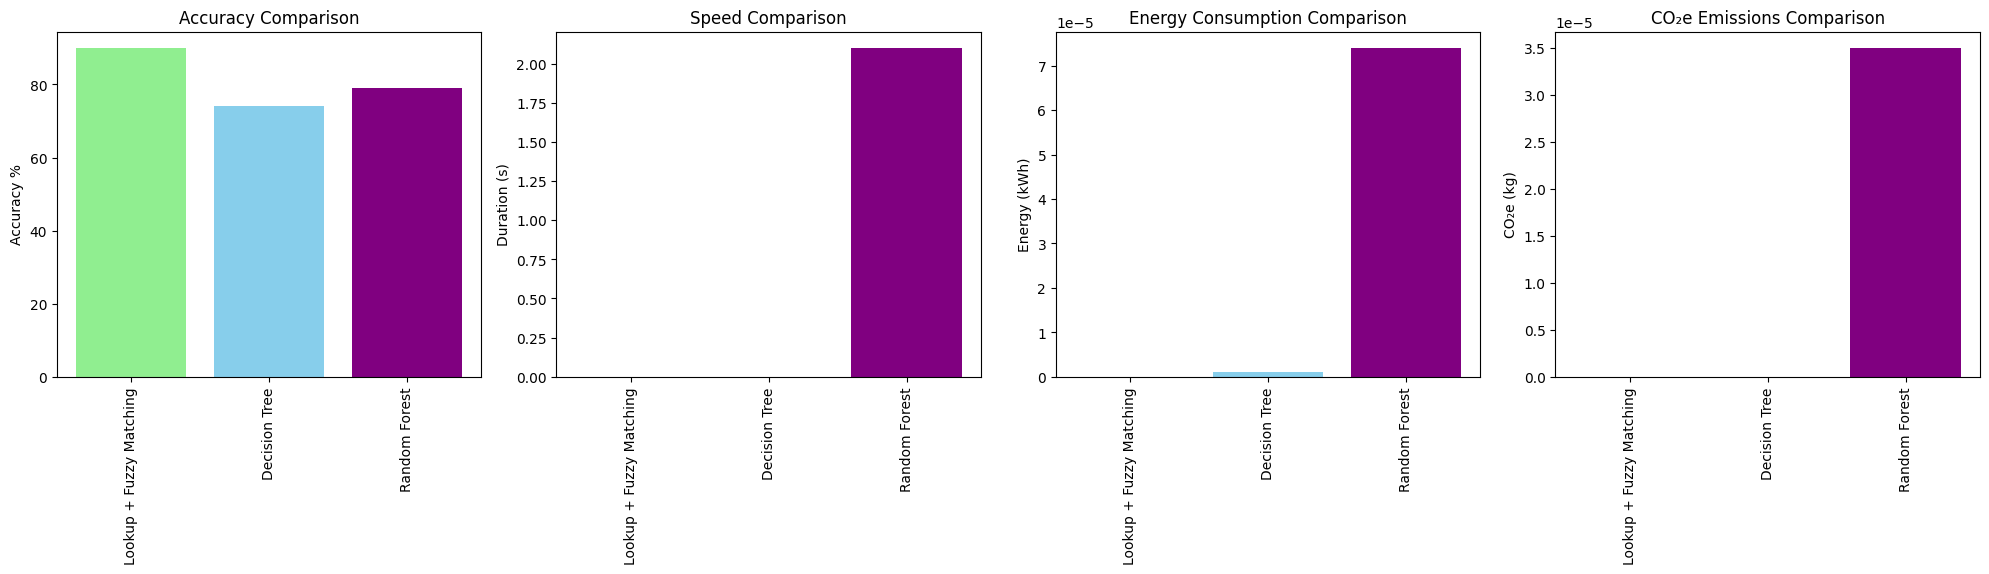

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


technique = ['Lookup + Fuzzy Matching', 'Decision Tree', 'Random Forest']
accuracy = [90, 74, 79]
duration = [0.0, 0.0, 2.1]
energy_consumed = [0.000000, 0.000001, 0.000074]
emissions = [0.000000, 0.000000, 0.000035]

data = pd.DataFrame({
    'Technique': technique,
    'Accuracy (%)': accuracy,
    'Duration (s)': duration,
    'Energy (kWh)': energy_consumed,
    'CO₂e (kg)': emissions
})

x = range(len(technique))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Plot Accuracy
axes[0].bar(x, data['Accuracy (%)'], color=['lightgreen', 'skyblue', 'purple'])
axes[0].set_ylabel('Accuracy %')
axes[0].set_title('Accuracy Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(data['Technique'], rotation=90)

# Plot Duration
axes[1].bar(x, data['Duration (s)'], color=['lightgreen', 'skyblue', 'purple'])
axes[1].set_ylabel('Duration (s)')
axes[1].set_title('Speed Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(data['Technique'], rotation=90)

# Plot Energy Consumed
axes[2].bar(x, data['Energy (kWh)'], color=['lightgreen', 'skyblue', 'purple'])
axes[2].set_ylabel('Energy (kWh)')
axes[2].set_title('Energy Consumption Comparison')
axes[2].set_xticks(x)
axes[2].set_xticklabels(data['Technique'], rotation=90)

# Plot CO2e Emissions
axes[3].bar(x, data['CO₂e (kg)'], color=['lightgreen', 'skyblue', 'purple'])
axes[3].set_ylabel('CO₂e (kg)')
axes[3].set_title('CO₂e Emissions Comparison')
axes[3].set_xticks(x)
axes[3].set_xticklabels(data['Technique'], rotation=90)


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show plots
plt.show()

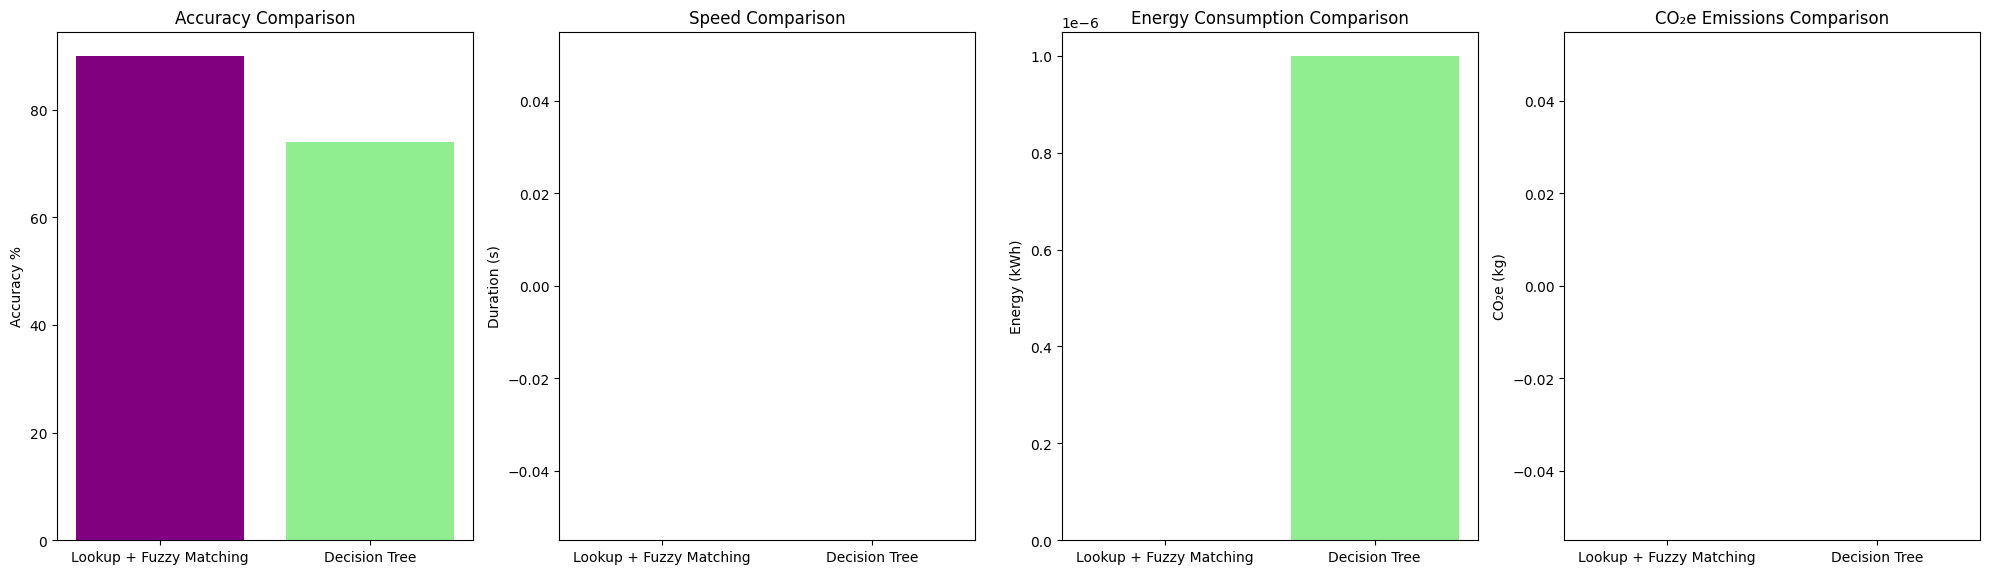

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


technique = ['Lookup + Fuzzy Matching', 'Decision Tree']
accuracy = [90, 74]
duration = [0.0, 0.0]
energy_consumed = [0.000000, 0.000001]
emissions = [0.000000, 0.000000]

data = pd.DataFrame({
    'Technique': technique,
    'Accuracy (%)': accuracy,
    'Duration (s)': duration,
    'Energy (kWh)': energy_consumed,
    'CO₂e (kg)': emissions
})

x = range(len(technique))

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Plot Accuracy
axes[0].bar(x, data['Accuracy (%)'], color=['purple', 'lightgreen'])
axes[0].set_ylabel('Accuracy %')
axes[0].set_title('Accuracy Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(data['Technique'])

# Plot Duration
axes[1].bar(x, data['Duration (s)'], color=['purple', 'lightgreen'])
axes[1].set_ylabel('Duration (s)')
axes[1].set_title('Speed Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(data['Technique'])

# Plot Energy Consumed
axes[2].bar(x, data['Energy (kWh)'], color=['purple', 'lightgreen'])
axes[2].set_ylabel('Energy (kWh)')
axes[2].set_title('Energy Consumption Comparison')
axes[2].set_xticks(x)
axes[2].set_xticklabels(data['Technique'])

# Plot CO2e Emissions
axes[3].bar(x, data['CO₂e (kg)'], color=['purple', 'lightgreen'])
axes[3].set_ylabel('CO₂e (kg)')
axes[3].set_title('CO₂e Emissions Comparison')
axes[3].set_xticks(x)
axes[3].set_xticklabels(data['Technique'])


# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show plots
plt.show()